In [ ]:
import pandas as pd

In [ ]:
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("Sales_Dummy_Data_Fixed.xlsx")

In [ ]:
df.head()

,Market_Potential,Salespeople,Units_Sold,Price_per_Unit,Marketing_Spend,Discount_Percent,Salesperson_Experience_Years,Sales,Total_Sales
0,645353,12,2938,409,32609,0,2,153073.250475,1201642
1,743712,16,1068,159,75183,10,12,370520.572524,169812
2,917841,6,2322,330,136465,8,14,585565.337735,766260
3,405595,5,1086,346,122555,17,1,336585.337873,375756
4,833660,17,1201,308,89754,13,2,318835.860958,369908


In [ ]:
Y = df["Sales"]


X = df[
    [
        "Market_Potential",
        "Salespeople",
        "Units_Sold",
        "Price_per_Unit",
        "Marketing_Spend",
        "Discount_Percent",
        "Salesperson_Experience_Years"
    ]
]

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     98.49
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           5.62e-24
Time:                        15:55:45   Log-Likelihood:                -587.93
No. Observations:                  50   AIC:                             1192.
Df Residuals:                      42   BIC:                             1207.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Excel file
file_path = "/content/Sales_Dummy_Data_Fixed.xlsx"
df = pd.read_excel(file_path)

# Display dataset
print("Dataset Preview:")
print(df.head())

# Independent variables (X) and Dependent variable (Y)
X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # last column (binary)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Coefficients
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_[0]):
    print(f"{col}: {coef}")

Dataset Preview:
   Market_Potential  Salespeople  Units_Sold  Price_per_Unit  Marketing_Spend  \
0            645353           12        2938             409            32609   
1            743712           16        1068             159            75183   
2            917841            6        2322             330           136465   
3            405595            5        1086             346           122555   
4            833660           17        1201             308            89754   

   Discount_Percent  Salesperson_Experience_Years          Sales  Total_Sales  
0                 0                             2  153073.250475      1201642  
1                10                            12  370520.572524       169812  
2                 8                            14  585565.337735       766260  
3                17                             1  336585.337873       375756  
4                13                             2  318835.860958       369908  

Accuracy: 0.0



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

In [ ]:
# Example new data (change values as needed)
# Ensure new_data has the same number of columns (8) as X
# The columns are: Market_Potential, Salespeople, Units_Sold, Price_per_Unit,
# Marketing_Spend, Discount_Percent, Salesperson_Experience_Years, Sales
new_data = pd.DataFrame(
    [[
        500000,  # Market_Potential
        10,      # Salespeople
        1500,    # Units_Sold
        250,     # Price_per_Unit
        75000,   # Marketing_Spend
        5,       # Discount_Percent
        8,       # Salesperson_Experience_Years
        300000   # Sales (This column is part of X, but typically for prediction, it's the target.
                 # For logistic regression prediction with this X, you might not provide 'Sales'
                 # but if X includes it, a placeholder or average value might be needed depending on your model intent)
    ]],
    columns=X.columns
)

prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

print("Predicted Class:", prediction[0])
print("Prediction Probability:", probability)


Predicted Class: 367416
Prediction Probability: [[2.76651289e-075 1.03088573e-012 9.29704716e-013 0.00000000e+000
  3.09596907e-076 1.64069776e-161 0.00000000e+000 2.36061212e-089
  9.99999999e-001 0.00000000e+000 1.43541492e-215 0.00000000e+000
  3.72046446e-041 3.22638680e-139 0.00000000e+000 1.40229672e-154
  0.00000000e+000 2.54869068e-176 2.12620369e-028 7.63344126e-020
  4.80827248e-015 0.00000000e+000 1.05822495e-026 2.12994538e-023
  4.52653831e-042 2.70247884e-109 0.00000000e+000 7.12108579e-010
  6.79459210e-159 0.00000000e+000 8.10543224e-021 1.68205433e-079
  6.92426737e-120 5.87293123e-072 1.25602165e-063 1.95039887e-276
  3.11566063e-056 0.00000000e+000 0.00000000e+000 0.00000000e+000]]


In [ ]:

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load Excel file
df = pd.read_excel("Sales_Dummy_Data_Fixed.xlsx")

# X = independent variables, Y = dependent (last column, binary)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Predict
predictions = model.predict(X)

# Output
print("Predictions:", predictions[:5])
print("Accuracy:", model.score(X, y))

Predictions: [1201642  169812  766260  375756  369908]
Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Load Excel file
df = pd.read_excel("Sales_Dummy_Data_Fixed.xlsx")

# X = independent variables, Y = dependent (last column)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create KNN model (k = 7)
model = KNeighborsClassifier(n_neighbors=3)

# Train model
model.fit(X, y)

# Predict
predictions = model.predict(X)

# Output
print("Predictions:", predictions[:5])
print("Accuracy:", model.score(X, y))

Predictions: [564365 169812 356378 375756 235320]
Accuracy: 0.36


Correlation with Sales:
Sales                           1.000000
Marketing_Spend                 0.847609
Salesperson_Experience_Years    0.601721
Market_Potential                0.127961
Discount_Percent                0.024346
Price_per_Unit                 -0.006980
Salespeople                    -0.014267
Total_Sales                    -0.215434
Units_Sold                     -0.254544
Name: Sales, dtype: float64


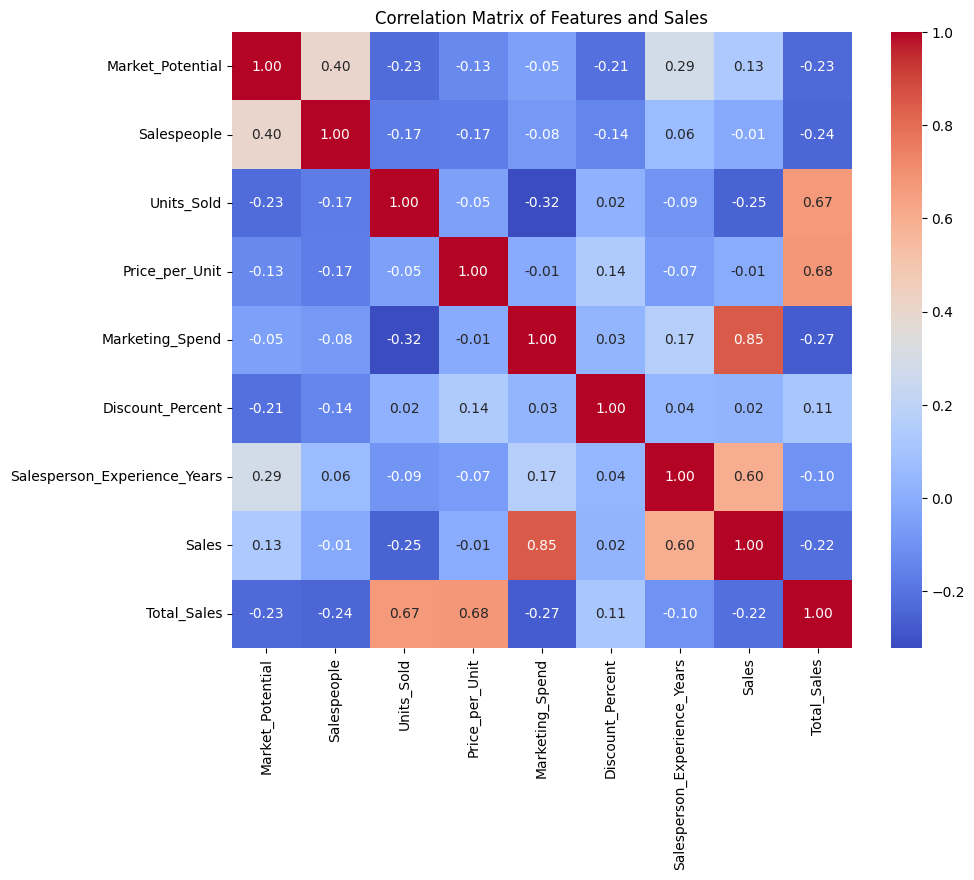

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Extract correlations with the 'Sales' column
    sales_correlations = correlation_matrix['Sales'].sort_values(ascending=False)

    print("Correlation with Sales:")
    print(sales_correlations)

    # Visualize the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Features and Sales')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor # Changed to Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score # Added R2 score for regression

# Load Excel dataset
try:
    df = pd.read_excel("/content/Sales_Dummy_Data_Fixed.xlsx")
except FileNotFoundError:
    print("Error: 'Sales_Dummy_Data_Fixed.xlsx' not found. Please ensure the file is uploaded to the Colab environment, or check the file path.")
    df = None

if df is not None:
    # Separate features and target
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Feature scaling (IMPORTANT for KNN)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # KNN model
    knn = KNeighborsRegressor() # Changed to Regressor

    # Hyperparameter tuning (finding best K)
    param_grid = {
        'n_neighbors': np.arange(1, 21),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    grid = GridSearchCV(
        knn,
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error' # Changed scoring for regression
    )

    # Train model
    grid.fit(X_train, y_train)

    # Best model
    best_knn = grid.best_estimator_

    # Predictions
    y_pred = best_knn.predict(X_test)

    # Results
    print("Best Parameters:", grid.best_params_)
    print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
    print("\nR-squared:", r2_score(y_test, y_pred))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(3), 'weights': 'distance'}

Mean Squared Error: 75386621175.23073

R-squared: -1.3901494164948174


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Excel file


# Separate X and Y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create Naive Bayes model
model = GaussianNB()

# Train model
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Output
print("Accuracy:", accuracy_score(y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.98

Confusion Matrix:
 [[19  0  0]
 [ 0 10  0]
 [ 0  1 20]]

Classification Report:
               precision    recall  f1-score   support

  High Sales       1.00      1.00      1.00        19
   Low Sales       0.91      1.00      0.95        10
Medium Sales       1.00      0.95      0.98        21

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Load Excel dataset
df = pd.read_excel("/content/Sales_Dummy_Data_Fixed.xlsx")

# Discretize the 'Sales' column into bins
num_bins = 3
df['Sales_Category'] = pd.cut(df['Sales'], bins=num_bins, labels=['Low Sales', 'Medium Sales', 'High Sales'])

# Features and new categorical target
X = df.iloc[:, :-1] # all columns except the last (original 'Sales')
y = df['Sales_Category'] # Use the new categorical 'Sales_Category'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y # Stratify can now be used with categorical y
)

# Pipeline: Scaling + Naive Bayes
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC (only applicable for binary classification, will not run for multi-class here)
# For multi-class, consider one-vs-rest or micro/macro average ROC-AUC if needed.
# if len(np.unique(y)) == 2:
#     roc_auc = roc_auc_score(y_test, y_prob[:, 1])
#     print("ROC-AUC Score:", roc_auc)

# Cross-validation score
cv_scores = cross_val_score(
    pipeline, X, y, cv=5, scoring='accuracy' # Use accuracy with categorical y
)

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy: 0.9230769230769231

Confusion Matrix:
 [[5 0 0]
 [0 3 0]
 [0 1 4]]

Classification Report:
               precision    recall  f1-score   support

  High Sales       1.00      1.00      1.00         5
   Low Sales       0.75      1.00      0.86         3
Medium Sales       1.00      0.80      0.89         5

    accuracy                           0.92        13
   macro avg       0.92      0.93      0.92        13
weighted avg       0.94      0.92      0.92        13


Cross-Validation Accuracy Scores: [1.  1.  0.9 0.8 0.9]
Mean CV Accuracy: 0.9200000000000002


In [ ]:
# Discretize the 'Sales' column into bins
# Define the number of bins or custom bin edges
# For simplicity, let's create 3 equal-width bins. You can adjust the number of bins or define custom edges if needed.
num_bins = 3
df['Sales_Category'] = pd.cut(df['Sales'], bins=num_bins, labels=['Low Sales', 'Medium Sales', 'High Sales'])

# Display the distribution of the new categorical variable
print("Distribution of Sales Categories:")
display(df['Sales_Category'].value_counts())

# Now, let's update our target variable 'y' to use the new 'Sales_Category'
y_categorical = df['Sales_Category']

Distribution of Sales Categories:


,count
Sales_Category,
Medium Sales,21
High Sales,19
Low Sales,10


Best Parameters: {'tree__min_samples_split': 5, 'tree__min_samples_leaf': 2, 'tree__max_depth': None, 'tree__criterion': 'gini'}

Train Accuracy: 1.0
Test Accuracy: 1.0

Confusion Matrix:
 [[5 0 0]
 [0 3 0]
 [0 0 5]]

Classification Report:
               precision    recall  f1-score   support

  High Sales       1.00      1.00      1.00         5
   Low Sales       1.00      1.00      1.00         3
Medium Sales       1.00      1.00      1.00         5

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Cross Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0

Feature Importance:
 Sales                           1.0
Market_Potential                0.0
Units_Sold                      0.0
Salespeople                     0.0
Price_per_Unit                  0.0
Marketing_Spend                 0.0
Discount_Percent                0.0
Salesperson_Experience_Years    0.0
dt

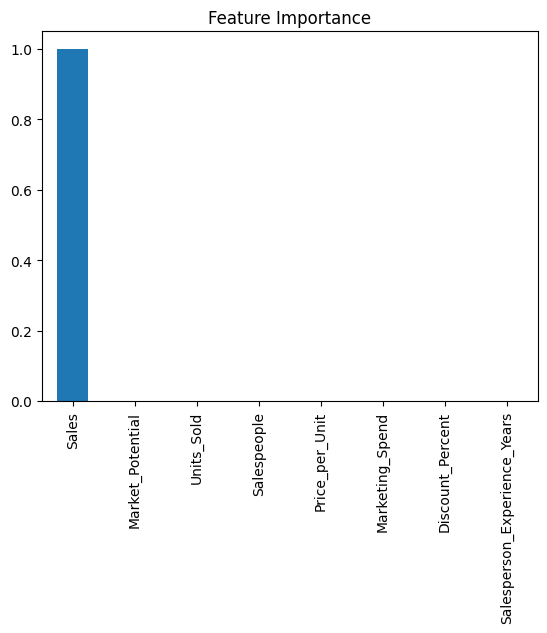

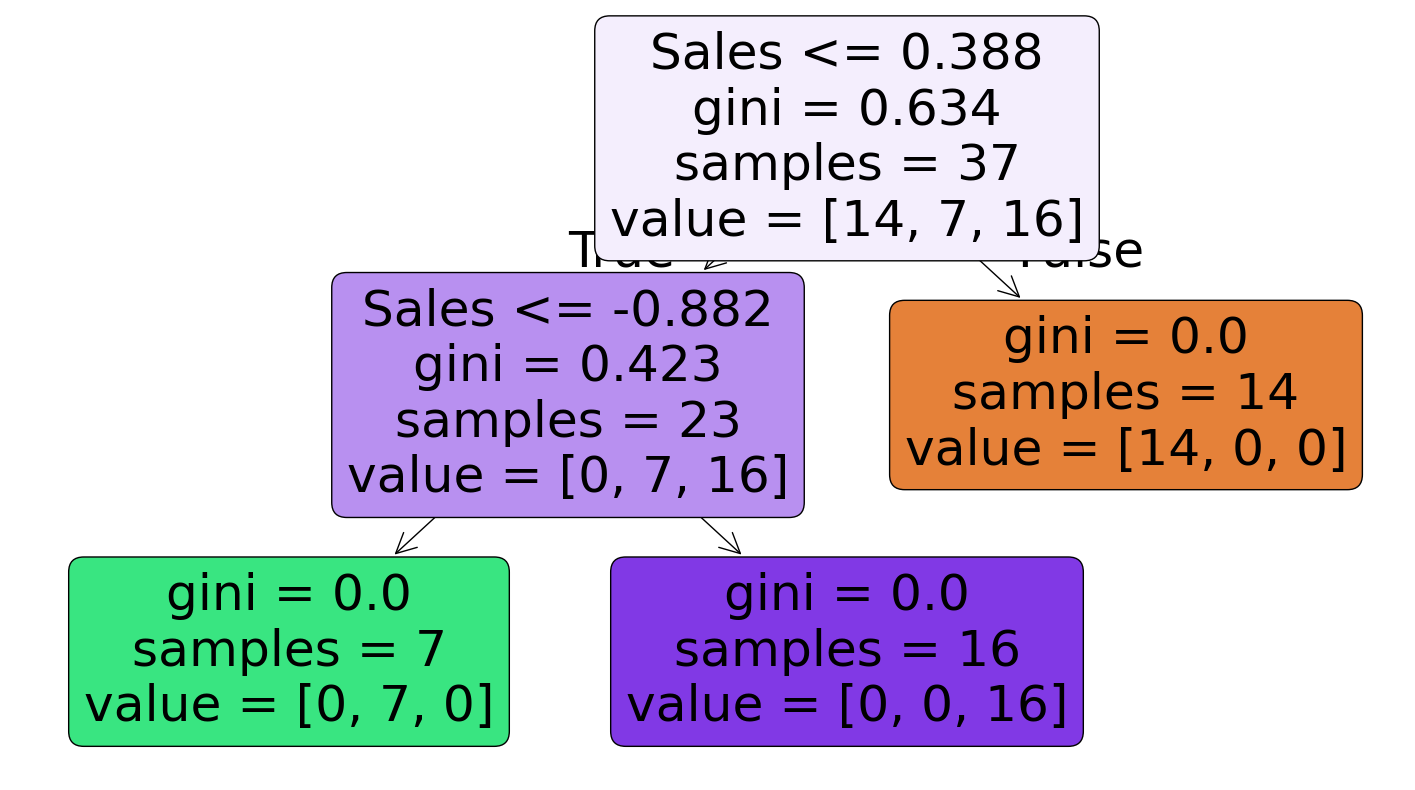

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score
)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Load Excel dataset
file_path = "/content/Sales_Dummy_Data_Fixed.xlsx"
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is uploaded to the Colab environment, or check the file path.")
    df = None # Set df to None to prevent further errors if file is missing

# -------------------------------
# Data Cleaning
# -------------------------------

# Only proceed if df was loaded successfully
if df is not None:
    # Fill missing values
    df.fillna(df.mean(numeric_only=True), inplace=True)

    # Discretize the 'Sales' column into bins for classification
    # Define the number of bins or custom bin edges
    num_bins = 3
    df['Sales_Category'] = pd.cut(df['Sales'], bins=num_bins, labels=['Low Sales', 'Medium Sales', 'High Sales'])

    # Features and new categorical target
    X = df.iloc[:, :-2] # all columns except the original 'Sales' and the new 'Sales_Category'
    y = df['Sales_Category'] # Use the new categorical 'Sales_Category'

    # -------------------------------
    # Train-Test Split
    # -------------------------------

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.25,
        random_state=42,
        stratify=y
    )

    # -------------------------------
    # Pipeline
    # -------------------------------

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier(random_state=42))
    ])

    # -------------------------------
    # Hyperparameter Tuning
    # -------------------------------

    param_dist = {

        'tree__max_depth':[None,5,10,15],

        'tree__min_samples_split':[2,5,10],

        'tree__min_samples_leaf':[1,2,4],

        'tree__criterion':['gini','entropy']
    }

    search = RandomizedSearchCV(
        pipeline,
        param_dist,
        n_iter=10,
        cv=5,
        scoring='accuracy',
        random_state=42
    )

    # Train model
    search.fit(X_train, y_train)

    best_model = search.best_estimator_

    # -------------------------------
    # Prediction
    # -------------------------------

    y_pred = best_model.predict(X_test)

    # -------------------------------
    # Evaluation
    # -------------------------------

    print("Best Parameters:", search.best_params_)

    train_acc = best_model.score(X_train, y_train)
    test_acc = best_model.score(X_test, y_test)

    print("\nTrain Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)

    print("\nConfusion Matrix:\n",
          confusion_matrix(y_test, y_pred))

    print("\nClassification Report:\n",
          classification_report(y_test, y_pred))

    # ROC AUC (Binary Case)
    # This part will not execute for multi-class classification directly without adjustments.
    # if len(np.unique(y)) == 2:
    #     prob = best_model.predict_proba(X_test)[:,1]
    #     print("ROC AUC Score:",
    #           roc_auc_score(y_test, prob))

    # -------------------------------
    # Cross Validation
    # -------------------------------

    cv = cross_val_score(
        best_model,
        X,
        y,
        cv=5
    )

    print("\nCross Validation Scores:", cv)
    print("Mean CV Accuracy:", cv.mean())

    # -------------------------------
    # Feature Importance
    # -------------------------------

    tree = best_model.named_steps['tree']

    importance = pd.Series(
        tree.feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)

    print("\nFeature Importance:\n", importance)

    importance.plot(kind='bar',
                    title="Feature Importance")

    plt.show()

    # -------------------------------
    # Tree Visualization
    # -------------------------------

    plt.figure(figsize=(18,10))

    plot_tree(
        tree,
        feature_names=X.columns,
        filled=True,
        rounded=True
    )

    plt.show()
else:
    print("Skipping model training and evaluation due to missing data file.")

In [17]:
import os

print("Files in current directory (" + os.getcwd() + "):")
for file in os.listdir('.'):
    print(file)

print("\nFiles in /content/ directory:")
if os.path.exists('/content'):
    for file in os.listdir('/content'):
        print(file)
else:
    print("/content/ directory not found.")

Files in current directory (/content):
.config
Sales_Dummy_Data_Fixed.xlsx
drive
sample_data

Files in /content/ directory:
.config
Sales_Dummy_Data_Fixed.xlsx
drive
sample_data


Best Parameters: {'tree__criterion': 'entropy', 'tree__max_depth': 3, 'tree__min_samples_split': 2}

Accuracy: 0.8461538461538461

Confusion Matrix:
 [[5 0 0]
 [0 3 0]
 [1 1 3]]

Classification Report:
               precision    recall  f1-score   support

  High Sales       0.83      1.00      0.91         5
   Low Sales       0.75      1.00      0.86         3
Medium Sales       1.00      0.60      0.75         5

    accuracy                           0.85        13
   macro avg       0.86      0.87      0.84        13
weighted avg       0.88      0.85      0.84        13



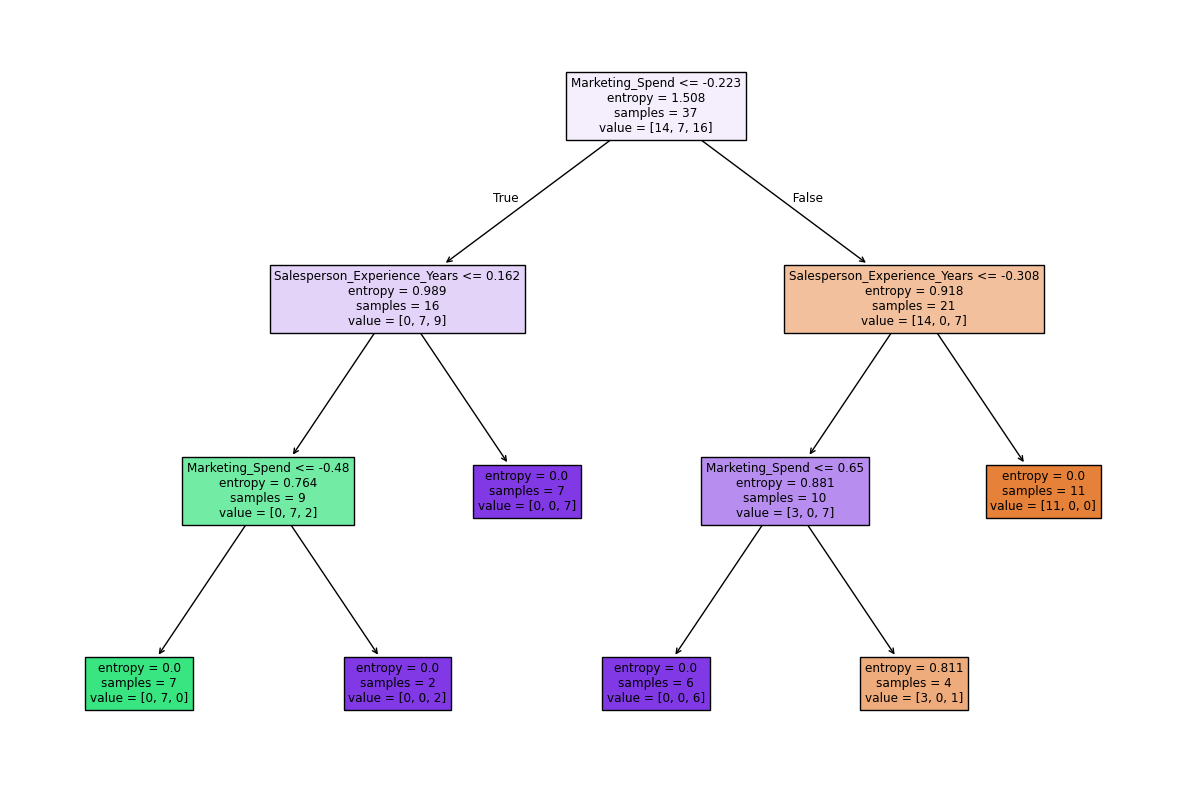

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Excel dataset
file_path = "/content/Sales_Dummy_Data_Fixed.xlsx"
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is uploaded to the Colab environment and the path is correct.")
    df = None # Set df to None to prevent further errors if file is missing

if df is not None:
    # Discretize the 'Sales' column into bins for classification
    num_bins = 3
    df['Sales_Category'] = pd.cut(df['Sales'], bins=num_bins, labels=['Low Sales', 'Medium Sales', 'High Sales'])

    # Features and new categorical target
    # X = df.iloc[:, :-1] # Original line, includes 'Sales' which causes data leakage if 'Sales_Category' is derived
    X = df.drop(columns=['Sales', 'Sales_Category']) # Exclude original 'Sales' and new 'Sales_Category' from features
    y = df['Sales_Category'] # Use the new categorical 'Sales_Category'

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y # Add stratify for categorical y
    )

    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier(random_state=42))
    ])

    # Hyperparameter tuning
    param_grid = {
        'tree__max_depth': [3,5,7,None],
        'tree__min_samples_split': [2,5,10],
        'tree__criterion': ['gini','entropy']
    }

    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='accuracy'
    )

    # Train model
    grid.fit(X_train, y_train)

    # Best model
    best_model = grid.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)

    # Evaluation
    print("Best Parameters:", grid.best_params_)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Tree Visualization
    plt.figure(figsize=(15,10))

    plot_tree(
        best_model.named_steps['tree'],
        feature_names=X.columns,
        filled=True
    )

    plt.show()
else:
    print("Skipping model training and evaluation due to missing data file.")

Accuracy : 0.6666666666666666
              precision    recall  f1-score   support

  High Sales       1.00      0.83      0.91         6
   Low Sales       0.43      1.00      0.60         3
Medium Sales       0.67      0.33      0.44         6

    accuracy                           0.67        15
   macro avg       0.70      0.72      0.65        15
weighted avg       0.75      0.67      0.66        15


Feature Importance
Marketing_Spend                 0.616815
Salesperson_Experience_Years    0.383185
Market_Potential                0.000000
Salespeople                     0.000000
Price_per_Unit                  0.000000
Units_Sold                      0.000000
Discount_Percent                0.000000
Total_Sales                     0.000000
dtype: float64


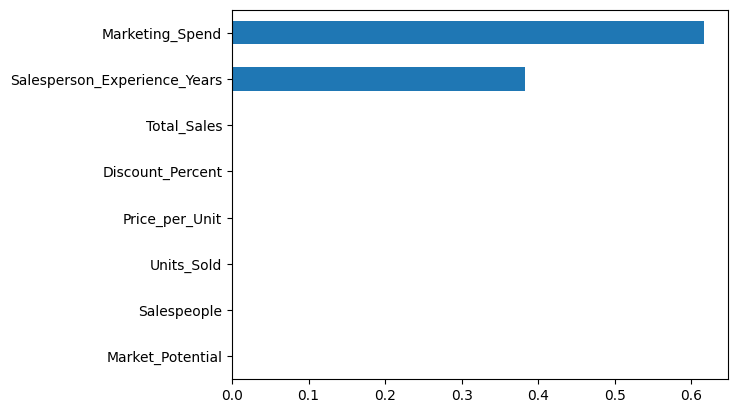

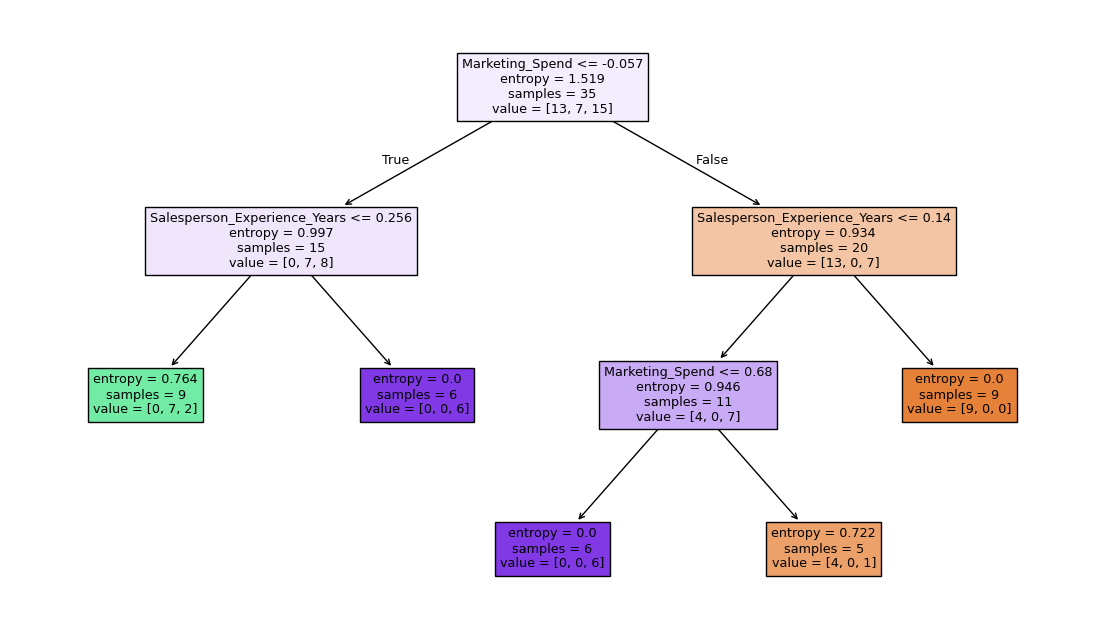

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/Sales_Dummy_Data_Fixed.xlsx"
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is uploaded to the Colab environment and the path is correct.")
    data = None

if data is not None:
    # Handle missing values
    data = data.fillna(data.mean(numeric_only=True))

    # Discretize the 'Sales' column into bins for classification
    num_bins = 3
    data['Sales_Category'] = pd.cut(data['Sales'], bins=num_bins, labels=['Low Sales', 'Medium Sales', 'High Sales'])

    # Features and target
    # Exclude original 'Sales' column and the new 'Sales_Category' from features
    X = data.drop(columns=['Sales', 'Sales_Category'])
    y = data['Sales_Category'] # Use the new categorical target

    # Split data
    # Use stratify for categorical target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=10, stratify=y
    )

    # Scaling
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Decision Tree
    tree = DecisionTreeClassifier(random_state=10)

    # Hyperparameter tuning
    params = {
        "max_depth":[3,5,7,10,None],
        "criterion":["gini","entropy"],
        "min_samples_split":[2,5,10]
    }

    model = GridSearchCV(tree, params, cv=5)

    # Train
    model.fit(X_train, y_train)

    best_tree = model.best_estimator_

    # Prediction
    pred = best_tree.predict(X_test)

    # Accuracy
    print("Accuracy :", accuracy_score(y_test, pred))

    # Report
    print(classification_report(y_test, pred))

    # Feature Importance
    importance = pd.Series(
        best_tree.feature_importances_,
        index=X.columns
    )

    print("\nFeature Importance")
    print(importance.sort_values(ascending=False))

    importance.sort_values().plot(kind="barh")
    plt.show()

    # Tree Visualization
    plt.figure(figsize=(14,8))

    plot_tree(
        best_tree,
        feature_names=X.columns,
        filled=True
    )

    plt.show()
else:
    print("Skipping model training and evaluation due to missing data file.")